In [102]:
import tensorflow as tf

In [103]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [104]:
nb_classes = 12

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#print("X_train original shape", X_train.shape)
#print("y_train original shape", y_train.shape)
#print("X_test0  original shape", X_test[0].shape)

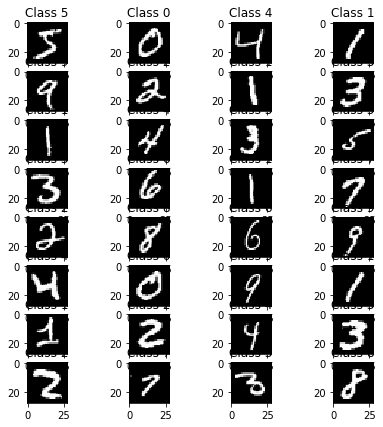

In [105]:
for line in X_train[0]:
    linestr=''
    for pix in line:
        linestr+=str(pix)+' '
    #print(linestr) 

for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

#print(y_train)

In [106]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#print("Training matrix shape", X_train.shape)
#print("Testing matrix shape", X_test.shape)

In [107]:
#print(X_train[0])

linestr=''
for i in range(len(X_train[0])):
    j=i%28
    if(j==0):
        #print(linestr)
        linestr=""
    linestr+="%.1f"%X_train[0][i]+" "

In [108]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
#print(len(Y_train))
#print(len(Y_train[0]))
#print(Y_train)
#print(Y_test)

In [109]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [110]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [111]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 19s 320us/step - loss: 0.2546 - val_loss: 0.1002
Epoch 2/4
60000/60000 [==============================] - 16s 262us/step - loss: 0.1013 - val_loss: 0.0834
Epoch 3/4
60000/60000 [==============================] - 16s 260us/step - loss: 0.0734 - val_loss: 0.0750
Epoch 4/4
60000/60000 [==============================] - 18s 308us/step - loss: 0.0557 - val_loss: 0.0664


In [112]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

10000/10000 [==============================] - 2s 217us/step
0.06644432998872363


In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

img=cv2.imread("F:/temporary storage/classifynum/nums.jpg")
img=cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
cv2.waitKey(0)
picSize=img.shape
W=int(picSize[1]/4)
H=int(picSize[0]/2)
for i in range(2):
    for j in range(4):
        imdig=img[H*i:H*i+H, W*j:W*j+W]
        #cv2.imshow("imdig",imdig)
        filename="hn"+str(i)+str(j)+".jpg"
        cv2.rectangle(img,(W*j,H*i),(W*j+W,H*i+H),(0,255,0),3)        
        cv2.imwrite(filename,imdig)
        cv2.waitKey(0)
#cv2.namedWindow('img',0)
#cv2.imshow("img",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#变为黑白并反色
for i in range(2):
    for j in range(4):
        filename="hn"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
        ret,thresh1=cv2.threshold(GrayImage,120,255,cv2.THRESH_BINARY)  
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        cv2.imwrite(outputfile,invimg)

        #准备数据，把3通道变为1通道灰色
        img=cv2.imread(outputfile)
        GrayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#数据格式整理，把28*28变为单784向量，输入归一化为0和1之间而不是0和255之间
X_pred = np.zeros(shape=(8,28,28))
index=0

for i in range(2):
    for j in range(4):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
#print(X_pred.shape)

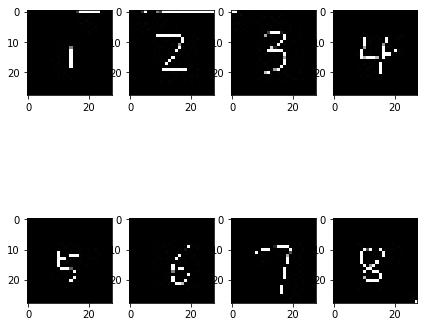

In [114]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')

In [115]:
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
#print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
#print(predicted_classes)

In [116]:
model.save("ministxkn.h5")
del model

try:
    predicted_classes = model.predict_classes(X_pred)
except:
    print("model not found, you have deleted it on purpose.")

model not found, you have deleted it on purpose.


In [117]:
from keras.models import load_model

model = load_model('ministxkn.h5')

predicted_classes = model.predict_classes(X_pred)
print (predicted_classes)

array2=[0,0,0,0,0,0,0,0]
total=0

for i in range(8):
    if predicted_classes[i]==i+1:
        array2[i]=1
        total+=1
    else:
        array2[i]=0

print(array2)

print("correct percentage:", total*100/8, "%")

[1 2 3 4 4 1 7 4]
[1, 1, 1, 1, 0, 0, 1, 0]
correct percentage: 62.5 %


In [118]:
X_train[0:8]=X_pred
#print(X_train[0:8])

In [119]:
for i in range(8):
    y_train[i]=i+1
Y_train=np_utils.to_categorical(y_train, nb_classes)

#print(Y_train[0:10])

In [120]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 16s 260us/step - loss: 0.0468 - val_loss: 0.0689
Epoch 2/4
60000/60000 [==============================] - 17s 289us/step - loss: 0.0371 - val_loss: 0.0656
Epoch 3/4
60000/60000 [==============================] - 19s 311us/step - loss: 0.0342 - val_loss: 0.0660
Epoch 4/4
60000/60000 [==============================] - 17s 275us/step - loss: 0.0313 - val_loss: 0.0694


In [121]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

array2=[0,0,0,0,0,0,0,0]
total=0

for i in range(8):
    if predicted_classes[i]==i+1:
        array2[i]=1
        total+=1
    else:
        array2[i]=0

print(array2)

print("correct percentage:", total*100/8, "%")

[1 2 3 4 5 6 7 8]
[1, 1, 1, 1, 1, 1, 1, 1]
correct percentage: 100.0 %
